At both ICCS and the CADD GRC this year I noticed multiple people, either in talks or on posters, reporting the "Tanimoto similarity" between two (or more) molecules. This is an unfortunate shorthand because it leaves out a critical piece of information: what fingerprint did you use when doing the Tanimoto calculation? Without knowing that, it's really not possible to make sense of what the reported similarity values actually mean. 

This isn't one of those examples of me being pedantic (or cranky); the Tanimoto similarities calculated using different fingerprints can be very, very different. I've written several blogs posts about this with more details, a couple of examples are [this post looking at the "noise threshold" of various fingerprints ](https://greglandrum.github.io/rdkit-blog/posts/2021-05-18-fingerprint-thresholds1.html) and [this one looking at what typical similarity values are between "closely related" compounds](https://greglandrum.github.io/rdkit-blog/posts/2021-05-21-similarity-search-thresholds.html).

As a quick illustration of this, I calculated the similarities between esomeprazole and lansoprazole, two molecules that look (to me at least) pretty similar:

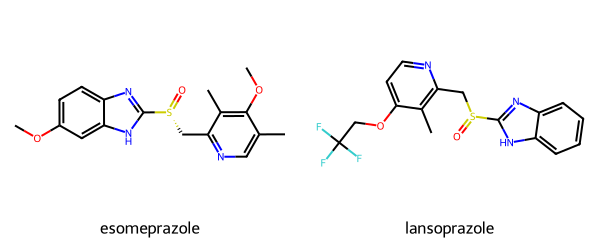

The Tanimoto similarity between these two molecules using the RDKit fingerprint is 0.79, using the Morgan2 fingerprint it's 0.43. That's a huge difference. If I had just said that the similarity was 0.43 and you guessed that I was using the RDKit fingerprint, which has a noise threshold of 0.51, you would conclude that the molecules are really not similar at all. With the Morgan2 fingerprint, on the other hand, 0.43 indicates two closely related molecules.

My concrete, and very easy to implement, suggestion: if you report a similarity value (in a talk, poster, paper, etc.) you should always mention the fingerprint used. So do something like "The Tanimoto similarity calculated using Morgan2 fingerprints was 0.43". It's not a lot of extra words, but it does allow your audience to understand what you actually did. And hopefully that's a good thing.

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs

import rdkit
print(rdkit.__version__)

2025.03.4


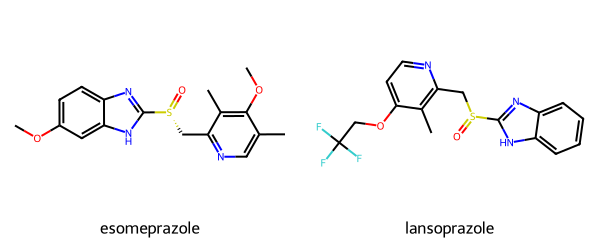

In [9]:
esomeprazole = Chem.MolFromSmiles('COc1ccc2nc([nH]c2c1)[S@](=O)Cc1ncc(C)c(OC)c1C')
lansoprazole = Chem.MolFromSmiles('FC(F)(F)COc1ccnc(c1C)CS(=O)c2[nH]c3ccccc3n2')
Draw.MolsToGridImage([esomeprazole, lansoprazole], 
    legends=['esomeprazole','lansoprazole'], molsPerRow=2, subImgSize=(300, 250))


In [5]:
rdk_fpg = rdFingerprintGenerator.GetRDKitFPGenerator()
mfp_fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2)
rdk_fps = [rdk_fpg.GetFingerprint(mol) for mol in [esomeprazole, lansoprazole]]
mfp_fps = [mfp_fpg.GetFingerprint(mol) for mol in [esomeprazole, lansoprazole]]
print('RDKit fingerprint similarity:', DataStructs.TanimotoSimilarity(rdk_fps[0], rdk_fps[1]))
print('Morgan fingerprint similarity:', DataStructs.TanimotoSimilarity(mfp_fps[0], mfp_fps[1]))

RDKit fingerprint similarity: 0.7943722943722944
Morgan fingerprint similarity: 0.4264705882352941


Out of curiousity, what are the Dice similarities between those fingerprints?

In [6]:
print('RDKit fingerprint similarity:', DataStructs.DiceSimilarity(rdk_fps[0], rdk_fps[1]))
print('Morgan fingerprint similarity:', DataStructs.DiceSimilarity(mfp_fps[0], mfp_fps[1]))

RDKit fingerprint similarity: 0.8854041013268998
Morgan fingerprint similarity: 0.5979381443298969
